# Loading modules

<font size=3 color=blue >cv2 是 OpenCV（Open Source Computer Vision Library）的 Python 接口，是一个强大的计算机视觉库

<font size=3 color=red>功能：
   
    图像处理：读取、写入和显示图像。
    图像变换：如旋转、缩放、裁剪等。
    图像分析：如边缘检测、轮廓检测、形态学操作等。
    机器学习：支持多种机器学习算法和模型。
    计算机视觉：如对象检测、面部识别、图像分割等。

In [237]:
import cv2

# numpy 是一个用于科学计算的库，它支持多维数组和矩阵操作，并提供了大量的数学函数库
import numpy as np

# seaborn 是基于 matplotlib 的高级数据可视化库，提供了更为美观和易用的统计图表。
import seaborn as sns

# matplotlib.pyplot 是一个用于绘制图形的命令风格的函数集合，类似于 MATLAB 的绘图功能
import matplotlib.pyplot as plt

# TSNE 是 scikit-learn 库中的一种非线性降维算法，用于将高维数据嵌入到低维空间（通常是二维或三维），以便进行可视化。
from sklearn.manifold import TSNE

# Import picture

In [240]:
# import picture with cv2
im=cv2.imread("./07fbc868088d6b99cc9c1b9c48f1db7-removebg-preview.png")

In [242]:
im

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[234, 243, 253],
        [235, 244, 254],
        [236, 245, 255],
        ...,
        [ 38,  70, 129],
        [ 60,  94, 153],
        [ 74, 108, 167]],

       [[239, 246, 255],
        [239, 246, 255],
        [240, 247, 255],
        ...,
        [ 73, 105, 164],
        [ 89, 121, 180],
        [ 66,  98, 157]],

       [[239, 245, 252],
        [240, 246, 253],
        [240, 246, 253],
        ...,
        [ 75, 105, 162],
        [ 63,  92, 149],
        [ 59,  86, 143]]

<font size=3 color=red><b>注意：

在使用 OpenCV (cv2 模块) 读取图像时，默认情况下图像的颜色通道顺序是 BGR（蓝-绿-红），而不是通常使用的 RGB（红-绿-蓝）。

这意味着如果你使用 OpenCV 读取一张图像并显示它，你可能会发现颜色不对，因为颜色通道顺序是反的

In [245]:
# 使用 numpy.dstack 将 BGR 顺序转换为 RGB 顺序
im = np.dstack([im[:,:,2], im[:,:,1], im[:,:,0]])

In [247]:
im.shape

(577, 432, 3)

    分布指y轴，x轴，与颜色通道数量

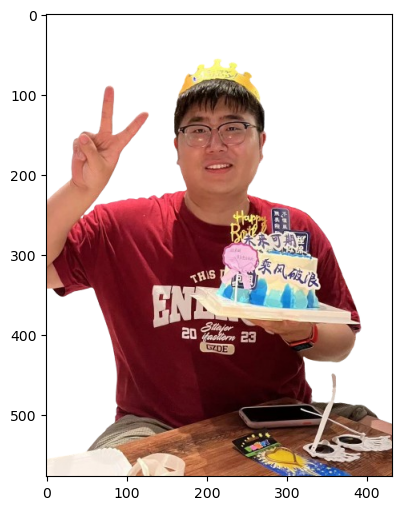

In [250]:
#调整picture size
plt.figure(figsize=(6,6))

# draw picture
ax = plt.imshow(im) 

# Chunks，sorting and liner list
1.将图片分成不同的chunks,每个chunks作为一个sample进行tsne绘图。

2.每个chunks将会有（红-绿-蓝）三个通道，我们把三个通道分开，会得到一组2维的x,y轴数字

3.然后我们把2维的x,y轴数字变成一维的list

4.最后我们把一维的list里面的数字从高到低排序

<font size=4 color=red><b>we want to compare each chunks(sample) overall color content

In [253]:
out=[]
avg_color=[]

#设置每个chunks的大小，如果为10，则为7*7=49 pixels
cs = 7

In [255]:
#使用循环提取每个chunk
for x in range(0,im.shape[1]-cs,cs):
    for y in range(0,im.shape[0]-cs,cs):
        # 提取并排序当前 chunk 中的每个颜色通道
        r=np.sort(np.ndarray.flatten(im[y:y+cs, x:x+cs, 0]))
        g=np.sort(np.ndarray.flatten(im[y:y+cs, x:x+cs, 1]))
        b=np.sort(np.ndarray.flatten(im[y:y+cs, x:x+cs, 2]))

        # 将排序后的颜色通道合并
        punch=np.concatenate((r,g,b))

        # 如果 punch 的平均值小于 255（表示不全是白色），则添加到 out 和 avg_color 列表
        #通过修改255到240，你可以更严格地过滤掉接近白色的块
        if punch.mean()<230:
           out.append(punch)
           avg_color.append([r.mean(),g.mean(),b.mean()])

In [257]:
# np.vstack 用于垂直堆叠数组，通常用于将多个数组（如列表中的多个数组）合并为一个二维数组
out =np.vstack(out)

In [258]:
out

array([[204, 205, 206, ..., 231, 236, 255],
       [200, 200, 200, ..., 118, 119, 123],
       [197, 198, 198, ..., 110, 110, 110],
       ...,
       [ 73,  78,  78, ...,  47,  50,  50],
       [104, 104, 107, ...,  58,  60,  60],
       [120, 124, 130, ...,  78,  81,  85]], dtype=uint8)

In [259]:
# avg_color 列表转换为 NumPy 数组
avg_color= np.array(avg_color)

In [260]:
avg_color

array([[223.85714286, 169.24489796, 151.44897959],
       [202.95918367, 136.81632653, 111.59183673],
       [200.7755102 , 134.36734694, 106.57142857],
       ...,
       [ 96.93877551,  48.73469388,  29.30612245],
       [125.53061224,  69.04081633,  44.73469388],
       [146.2244898 ,  88.91836735,  61.12244898]])

In [265]:
out.shape

(2750, 147)

<font size=3 color=blue>We have 1423 chunks ，and 7 * 7 *3 = 147 Color Numbers

# TSNE algorithm

In [269]:
# 使用 t-SNE 进行降维
res= TSNE(perplexity=30,random_state=2).fit_transform(out)

# perplexity: 这个参数是 t-SNE 中的一个重要参数，影响模型如何平衡局部和全局的方面。
# 通常取值在 5 到 50 之间。较小的值倾向于更多地关注局部结构，而较大的值则会更多地关注全局结构。

# random_state: 设置这个参数可以使得每次运行 t-SNE 时得到相同的结果，便于重现实验。

In [271]:
res

array([[ 45.198704  ,   0.80228245],
       [ 43.51203   , -18.826124  ],
       [ 41.44831   , -19.908396  ],
       ...,
       [-20.308268  ,   0.19475105],
       [-10.964331  ,  -9.743131  ],
       [ -1.6797725 , -15.707793  ]], dtype=float32)

In [273]:
res.shape

(2750, 2)

<font size=3 color=blue>We found only 2 Dimension on each chunks

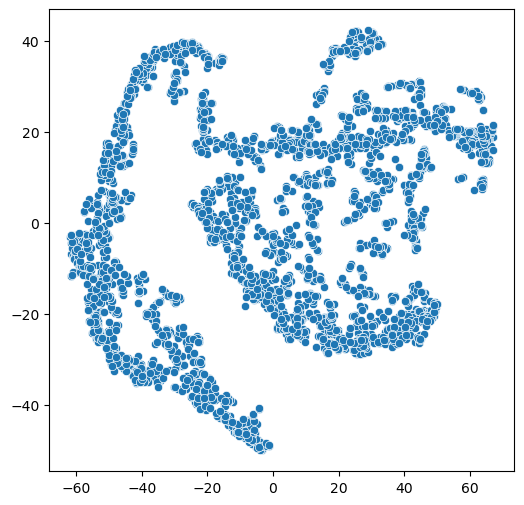

In [276]:
#调整picture size
plt.figure(figsize=(6,6))

#画图
ax= sns.scatterplot(x=res[:,0],y=res[:,1])

# Circle patches

In [279]:
# Circle 是 matplotlib.patches 模块中的一个类，用于在图中绘制圆形补丁
# Circle 类可以帮助您在图中绘制和定制圆形。
from matplotlib.patches import Circle

In [281]:
avg_color

array([[223.85714286, 169.24489796, 151.44897959],
       [202.95918367, 136.81632653, 111.59183673],
       [200.7755102 , 134.36734694, 106.57142857],
       ...,
       [ 96.93877551,  48.73469388,  29.30612245],
       [125.53061224,  69.04081633,  44.73469388],
       [146.2244898 ,  88.91836735,  61.12244898]])

     在Circle中，要求color的范围在0-1 ，所以要把avg_color的数字范围变成0-1

In [284]:
#把avg_color的范围变成0-1
avg_color=avg_color/255

#把avg_color变成元祖
avg_color=[tuple(x) for x in avg_color]

In [286]:
avg_color

[(0.8778711484593837, 0.6637054821928772, 0.5939175670268108),
 (0.7959183673469388, 0.5365346138455382, 0.43761504601840734),
 (0.7873549419767907, 0.5269307723089236, 0.41792717086834735),
 (0.8007202881152461, 0.5355742296918768, 0.41920768307322925),
 (0.8185674269707883, 0.5434173669467788, 0.43249299719887957),
 (0.8317727090836334, 0.5431772709083633, 0.43713485394157664),
 (0.8238495398159265, 0.5346138455382153, 0.42841136454581835),
 (0.8168867547018807, 0.5280512204881953, 0.4217687074829932),
 (0.8004001600640256, 0.5138855542216887, 0.4066426570628251),
 (0.7913565426170468, 0.5064425770308123, 0.4011204481792717),
 (0.768547418967587, 0.5050820328131252, 0.38759503801520606),
 (0.7128451380552221, 0.4587434973989596, 0.350140056022409),
 (0.6936374549819928, 0.43033213285314126, 0.33197278911564626),
 (0.746298519407763, 0.4837134853941577, 0.3847939175670268),
 (0.7681472589035614, 0.5032412965186075, 0.40368147258903564),
 (0.8370548219287716, 0.5847138855542217, 0.4874

(-54.873165130615234, 47.26768112182617)

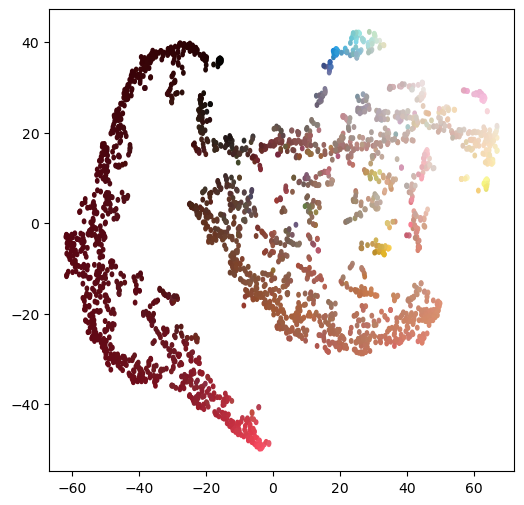

In [292]:
#创建图形和轴
flg,ax=plt.subplots(figsize=(6,6))

#对于每个坐标和颜色，创建一个圆并添加到轴中
for x in range(0,len(res)):
    patch = Circle((res[x][0], res[x][1]), 
                   0.5, #代表圆的半径
                   color = avg_color[x])
    ax.add_patch(patch)   


# 限定x轴，y轴的范围
plt.xlim(res[:,0].min()-5,res[:,0].max()+ 5)
plt.ylim(res[:,1].min()-5,res[:,1].max()+ 5)   